In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_iris

data = load_iris()

In [3]:
features = data.data   
feature_names = data.feature_names
target = data.target
target_names = data.target_names

In [4]:
features.shape

(150, 4)

In [5]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

In [7]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [8]:
X_train[0]

array([5. , 2. , 3.5, 1. ])

아래 max_depth 를 바꾸어가며 결과를 관찰해보세요

In [9]:
from sklearn import tree
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [10]:
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [11]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_tr)))

Accuracy: 0.9778


In [12]:
iris_tree.predict([[1, 2, 3, 4]])

array([2])

In [13]:
import pandas as pd
conf_matrix = pd.crosstab(y_pred_tr, y_test)

In [14]:
print(conf_matrix)

col_0   0   1   2
row_0            
0      16   0   0
1       0  17   0
2       0   1  11


In [15]:
from util.plot_util import plot_confusion_matrix

In [16]:
class_name = target_names#['c0', 'c1', 'c2']

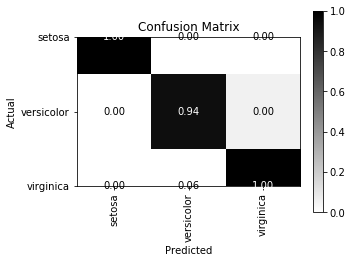

In [18]:
fig = plot_confusion_matrix(y_test, y_pred_tr, classes=class_name, figsize=(5,5), cmap = plt.cm.binary, normalize=True)